In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def knn(k, training_data, test_data):
    confusion_matrix = np.zeros((10,10))
    # For each sample from test data
    for index_row, row in enumerate(test_data):
        distances = np.zeros((training_data.shape[0]))
        # For each sample from training data
        for index_sample, sample in enumerate(training_data):
            # Compute the distance between the samples
            distances[index_sample] = np.sum(np.square(row[1:]-sample[1:])) # skip label 
        # Find k nearest neighbours
        ind = np.argpartition(distances, k)[:k]
        # Find the most common label of those neighbours
        labels = np.array(training_data[ind][0:,0:1].flatten(), dtype=np.int8)
        label = np.argmax(np.bincount(labels))
        #print(row[0], label)
        # Update confusion matrix
        confusion_matrix[int(row[0]), label] +=1

    return confusion_matrix

def print_function(k, num_correct, num_total, accuracy, error_rate, df):
    print('%-20s %5d' % ('k value:', k))
    print('%-20s %5d' % ('correct predictions:', num_correct))
    print('%-20s %5d' % ('total predictions:', num_total))
    print('%-20s %02.3f' %  ('Accuracy: ', accuracy))
    print('%-20s %02.3f\n' %  ('Error rate:', error_rate))
    print('Confusion matrix: \n\n',df)
          
def compute_error(np_matrix, k):
    df = pd.DataFrame(np_matrix, index=[x for x in range(0,10)], columns=[x for x in range(0,10)], dtype=np.uint8)
    # accuracy = correct_predictions/total_predictions
    num_correct = (df.values[range(df.values.shape[0]),range(df.values.shape[0])]).sum()
    num_total = df.values[range(0,10)].sum(axis=0, dtype=np.uint8).sum()
    accuracy = num_correct / num_total
    error_rate =  round((1 - accuracy),3)
    print_function(k, num_correct, num_total, accuracy, error_rate, df)
    
    return error_rate
          
   
if __name__ == '__main__':
    # Load the training and test dataset
    df = pd.read_csv('zip.train', sep=' ', header=None, usecols=list(range(0, 257)))
    training_data = np.array(df, dtype=np.float32) 
    df = pd.read_csv('zip.test', sep=' ', header=None, usecols=list(range(0, 257)))
    test_data = np.array(df, dtype=np.float32)[0:300]
    measurements = np.zeros(10)
   
    # Specify k
    for k in range(1,2):
        np_matrix = knn(k, training_data, test_data)
        measurements[k] = compute_error(np_matrix, k)
        
    plt.plot(measurements)
    plt.xlabel('k value')
    plt.ylabel('Error rate')
    
%time  


#plt.imshow(confusion_matrix)
#plt.colorbar(label='Number of occurences')
#plt.suptitle('Confusion matrix', fontsize=20)
#plt.xlabel('predicted class', fontsize=18)
#plt.ylabel('actual class', fontsize=16)
#plt.show()
#print(actual_class)  

KeyboardInterrupt: 

In [28]:
import numpy as np

a = np.arange(0,12).reshape(3,4)
b = np.arange(0,4)

print(a[0:,1:])
print(b)

a = np.sum(np.square(a - b), axis=1)
b = a > 5

print(a[b])

[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]
[0 1 2 3]
[ 64 256]


k value:                 1
correct predictions:   187
total predictions:     200
Accuracy:            0.935
Error rate:          0.065

Confusion matrix: 

     0   1   2   3   4  5   6   7   8   9
0  47   0   0   0   0  0   0   0   0   1
1   0  16   0   0   0  0   0   0   0   0
2   3   0  20   1   0  0   0   0   0   0
3   1   0   0  11   0  1   0   0   0   0
4   0   1   0   0  14  0   0   0   0   0
5   0   0   1   0   0  9   0   0   0   0
6   0   0   1   0   1  0  21   0   0   0
7   0   0   0   0   0  0   0  15   0   0
8   1   0   0   1   0  0   0   0  11   0
9   0   0   0   0   0  0   0   0   0  23
k value:                 2
correct predictions:   187
total predictions:     200
Accuracy:            0.935
Error rate:          0.065

Confusion matrix: 

     0   1   2   3   4  5   6   7   8   9
0  47   0   0   0   0  0   0   0   0   1
1   0  16   0   0   0  0   0   0   0   0
2   4   0  20   0   0  0   0   0   0   0
3   1   0   0  11   0  1   0   0   0   0
4   0   1   0   0  14  0   0  

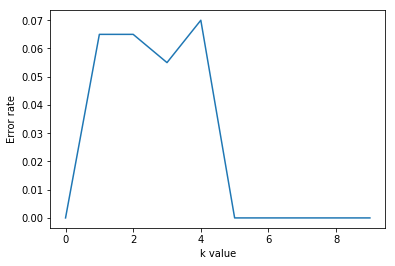

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def knn(k, training_data, test_data):
    confusion_matrix = np.zeros((10,10))
    # For each sample from test data
    for index_row, row in enumerate(test_data):    
        # Compute the distance between the samples
        distances = np.sum(np.square(training_data[0:,1:] - row[1:]), axis=1)
        # Find k nearest neighbours
        ind = np.argpartition(distances, k)[:k]
        # Find the most common label of those neighbours
        labels = np.array(training_data[ind][0:,0:1].flatten(), dtype=np.int8)
        label = np.argmax(np.bincount(labels))
        #print(row[0], label)
        # Update confusion matrix
        confusion_matrix[int(row[0]), label] +=1

    return confusion_matrix

def print_function(k, num_correct, num_total, accuracy, error_rate, df):
    print('%-20s %5d' % ('k value:', k))
    print('%-20s %5d' % ('correct predictions:', num_correct))
    print('%-20s %5d' % ('total predictions:', num_total))
    print('%-20s %02.3f' %  ('Accuracy: ', accuracy))
    print('%-20s %02.3f\n' %  ('Error rate:', error_rate))
    print('Confusion matrix: \n\n',df)
          
def compute_error(np_matrix, k):
    df = pd.DataFrame(np_matrix, index=[x for x in range(0,10)], columns=[x for x in range(0,10)], dtype=np.uint8)
    # accuracy = correct_predictions/total_predictions
    num_correct = (df.values[range(df.values.shape[0]),range(df.values.shape[0])]).sum()
    num_total = df.values[range(0,10)].sum(axis=0, dtype=np.uint8).sum()
    accuracy = num_correct / num_total
    error_rate =  round((1 - accuracy),3)
    print_function(k, num_correct, num_total, accuracy, error_rate, df)
    
    return error_rate
          
   
if __name__ == '__main__':
    # Load the training and test dataset
    df = pd.read_csv('zip.train', sep=' ', header=None, usecols=list(range(0, 257)))
    training_data = np.array(df, dtype=np.float32) 
    df = pd.read_csv('zip.test', sep=' ', header=None, usecols=list(range(0, 257)))
    test_data = np.array(df, dtype=np.float32)[0:200]
    measurements = np.zeros(10)
   
    # Specify k
    for k in range(1,5):
        np_matrix = knn(k, training_data, test_data)
        measurements[k] = compute_error(np_matrix, k)
        
    plt.plot(measurements)
    plt.xlabel('k value')
    plt.ylabel('Error rate')
    
%time  


#plt.imshow(confusion_matrix)
#plt.colorbar(label='Number of occurences')
#plt.suptitle('Confusion matrix', fontsize=20)
#plt.xlabel('predicted class', fontsize=18)
#plt.ylabel('actual class', fontsize=16)
#plt.show()
#print(actual_class)  

In [9]:
import numpy as np

a = np.arange(0,6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)
clusters = np.zeros((a.shape[0],1))

#clusters[0] = np.sum(np.square(a[1] - b[1]))
#print(clusters)


dist = np.sum(np.square(a[0] - b[1]))

# for each sample of the dataset 
for index_row, row in enumerate(a):
    distances = np.zeros((2,1))
    # for each cluster center
    for index_cluster, cluster in enumerate(b):
        # compute the distance between the center and the sample
        distances[index_cluster] = np.sum(np.square(row - cluster))
    # assign the sample to its nearest center
    clusters[index_row] = np.argmin(distances)
 




In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('zip.train', sep=' ', header=None, usecols=list(range(0, 257)))
a = np.array(dataset, dtype=np.float16)
features = a[0:,1:]
labels = a[0:,0]
clusters = a[np.random.randint(0, labels.size, size=10)]

features[clusters[1]]

for row,  in a:
    for cluster in clusters:
        distance = np.sum(np.square(row[1:] - cluster[1:]))